In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [ ]:
data = pd.read_csv(r'/content/CarPrice_Assignment.csv')

print(data.info())
print(data.describe())
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
# One-hot encoding for the 'fueltype'
data = pd.get_dummies(data, columns=['fueltype'], drop_first=True)

# Check the updated DataFrame's columns
print("Columns after one-hot encoding:\n", data.columns)

Columns after one-hot encoding:
 Index(['car_ID', 'symboling', 'CarName', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'fueltype_gas'],
      dtype='object')


In [ ]:
# Convert categorical columns using Label Encoding for other categorical variables
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data["enginetype"] = label_encoder.fit_transform(data["enginetype"])
data["carbody"] = label_encoder.fit_transform(data["carbody"])

In [ ]:
# Selecting features (independent variables)
# Update feature selection based on the actual column names
X = data[['horsepower', 'enginesize', 'enginetype', 'carbody', 'fueltype_diesel']] if 'fueltype_diesel' in data.columns else data[['horsepower', 'enginesize', 'enginetype', 'carbody']]

# target variable
Y = data['price']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print('Mean Squared Error: ', mean_squared_error(Y_test, y_pred))
print('Mean Absolute Error: ', mean_absolute_error(Y_test, y_pred))
print('Root Mean Squared Error: ', math.sqrt(mean_squared_error(Y_test, y_pred)))

Mean Squared Error:  15633073.22984185
Mean Absolute Error:  2749.6020331322816
Root Mean Squared Error:  3953.868135110458


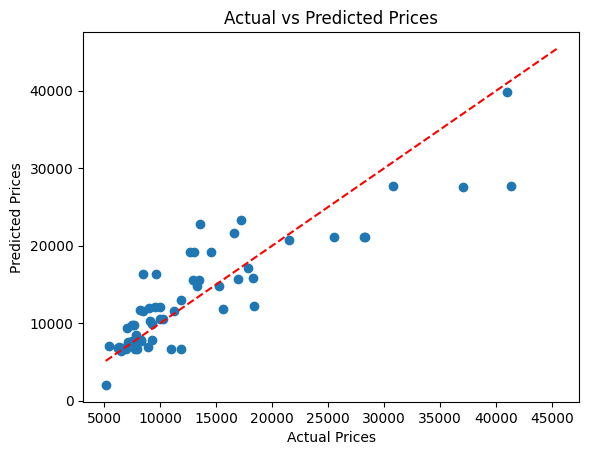

In [ ]:
# Visualizing actual and predicted values
plt.scatter(Y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], color='red', linestyle='--')  # Diagonal line
plt.show()

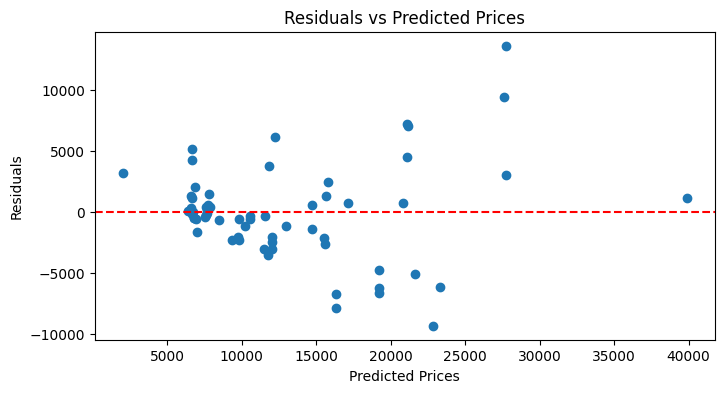

In [ ]:
# Calculating residuals
residuals = Y_test - y_pred

# Plotting residuals
plt.figure(figsize=(8, 4))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Prices')
plt.show()
